## Assignment2: Tree Based Models
## 7/10/2021
## Shawn Meng

### 1. Read in the Sportify data and perform the standard 70/30 split into train/validation. Perform any data visualization relevant for this dataset.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df1 = pd.read_csv("dataset-of-00s.csv")

In [3]:
df1.shape

(5872, 19)

In [4]:
df1.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.57800,0.47100,4,-7.27000,1,0.02890,0.36800,0.00000,0.15900,0.53200,133.06100,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.70400,0.85400,10,-5.47700,0,0.18300,0.01850,0.00000,0.14800,0.68800,92.98800,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.16200,0.83600,9,-3.00900,1,0.04730,0.00011,0.00457,0.17400,0.30000,86.96400,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.18800,0.99400,4,-3.74500,1,0.16600,0.00001,0.07840,0.19200,0.33300,148.44000,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.63000,0.76400,2,-4.35300,1,0.02750,0.36300,0.00000,0.12500,0.63100,112.09800,193760,4,22.62384,10,1


In [5]:
train_set, val_set = train_test_split(df1, train_size = 0.7, random_state = 9660)

In [6]:
## check for missing values first
df1.isna().any()

track               False
artist              False
uri                 False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
chorus_hit          False
sections            False
target              False
dtype: bool

In [7]:
## this dataset appears to be pretty clean.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   uri               5872 non-null   object 
 3   danceability      5872 non-null   float64
 4   energy            5872 non-null   float64
 5   key               5872 non-null   int64  
 6   loudness          5872 non-null   float64
 7   mode              5872 non-null   int64  
 8   speechiness       5872 non-null   float64
 9   acousticness      5872 non-null   float64
 10  instrumentalness  5872 non-null   float64
 11  liveness          5872 non-null   float64
 12  valence           5872 non-null   float64
 13  tempo             5872 non-null   float64
 14  duration_ms       5872 non-null   int64  
 15  time_signature    5872 non-null   int64  
 16  chorus_hit        5872 non-null   float64


In [8]:
## split the label and predictors
train_y = train_set.target
val_y = val_set.target

In [9]:
train_x = train_set.drop(['target','uri','artist'], axis = 1)
val_x = val_set.drop(['target','uri','artist'], axis = 1)

In [10]:
unique_n = []
unique_values = []

for i in train_x.columns:
    unique_n.append(len(train_x[i].unique()))
    unique_values.append(train_x[i].unique())
    

In [11]:
feature_df = pd.DataFrame(list(zip(train_x.columns, unique_n, unique_values)), columns = ['Feature', 'unique_counts', 'unique_values'])
feature_df

,Feature,unique_counts,unique_values
0,track,3981,"[Money Maker, Discoblood (Demo), Burarum, So S..."
1,danceability,839,"[0.46399999999999997, 0.24, 0.305, 0.426, 0.50..."
2,energy,919,"[0.598, 0.9640000000000001, 0.551, 0.784, 0.78..."
3,key,12,"[1, 10, 3, 7, 5, 2, 11, 9, 8, 0, 4, 6]"
4,loudness,3345,"[-6.79, -3.765, -6.984, -3.225, -6.205, -6.949..."
5,mode,2,"[1, 0]"
6,speechiness,1000,"[0.27, 0.1, 0.0423, 0.0421, 0.0329, 0.0321, 0...."
7,acousticness,2257,"[0.149, 0.0211, 0.0038200000000000005, 0.306, ..."
8,instrumentalness,1817,"[0.0, 0.0556, 0.37200000000000005, 0.0128, 0.7..."
9,liveness,1063,"[0.299, 0.35200000000000004, 0.301, 0.0695, 0...."


In [18]:
train_x

,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
5052,Money Maker,0.46400,0.59800,1,-6.79000,1,0.27000,0.14900,0.00000,0.29900,0.61200,79.73200,230613,4,31.67163,9
1991,Discoblood (Demo),0.24000,0.96400,1,-3.76500,1,0.10000,0.02110,0.05560,0.35200,0.12500,119.79000,240107,4,63.61188,9
4133,Burarum,0.30500,0.55100,10,-6.98400,1,0.04230,0.00382,0.37200,0.30100,0.10500,99.97000,314760,4,81.47703,8
3229,So Small,0.42600,0.78400,3,-3.22500,1,0.04210,0.30600,0.00000,0.06950,0.27200,147.93900,225213,3,39.06367,7
4479,Where Do We Go From Here,0.50100,0.78500,7,-6.20500,1,0.03290,0.00027,0.01280,0.36000,0.21000,94.10900,334933,4,47.03959,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,Apologize,0.59300,0.74000,8,-6.12000,1,0.03390,0.36300,0.00002,0.10200,0.50200,118.00800,208107,4,30.48457,7
4468,Life Is Too Short,0.57400,0.80700,0,-7.71000,1,0.04700,0.00874,0.09650,0.10600,0.62400,135.00400,221205,4,35.06677,7
2211,Soak Up The Sun,0.71700,0.73300,4,-4.98500,1,0.04270,0.03980,0.00000,0.13600,0.71300,119.99600,292307,4,32.94086,15
506,Who The F*** Is That?,0.83900,0.50800,11,-6.18200,1,0.08790,0.00974,0.00000,0.09620,0.55900,82.02700,250627,4,25.53615,17


Text(0.5, 1.0, 'distribution of label of the spotify dataset')

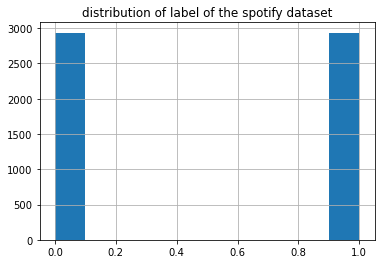

In [12]:
df1.target.hist()
plt.title('distribution of label of the spotify dataset')

### the labels of the spotify dataset are equally distributed.

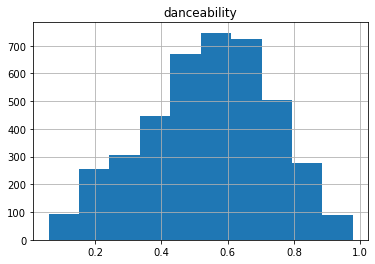

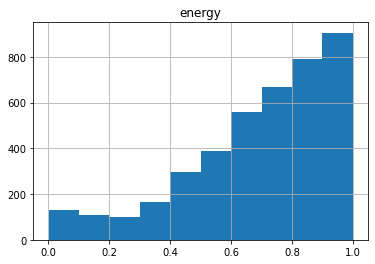

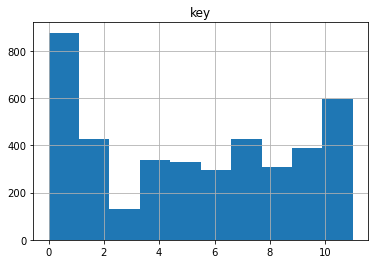

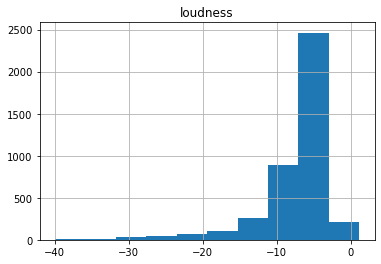

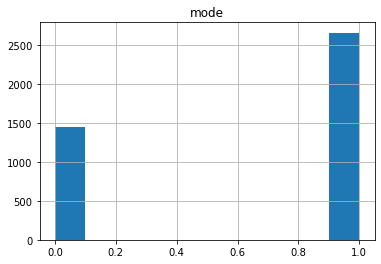

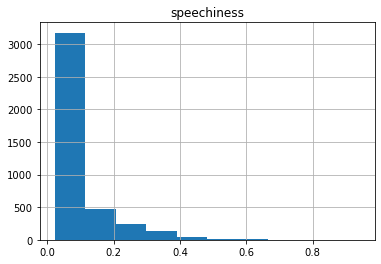

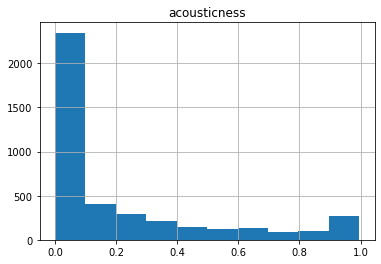

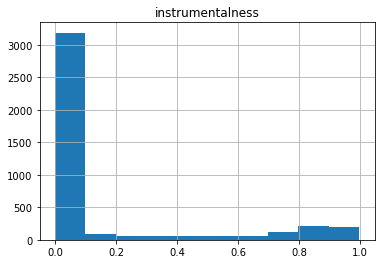

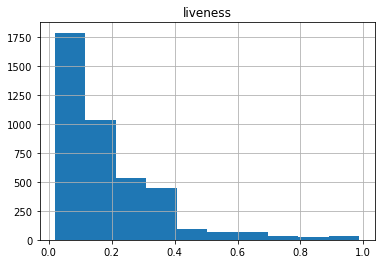

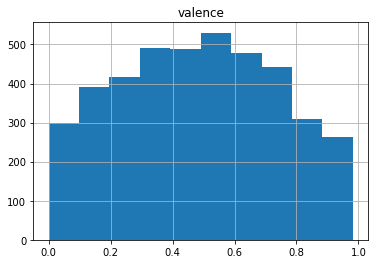

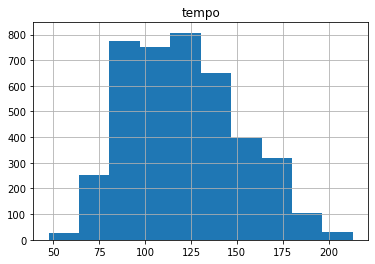

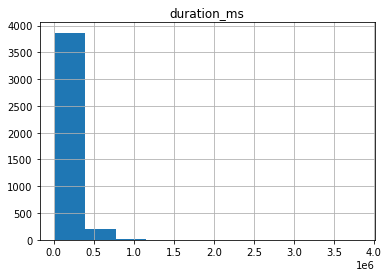

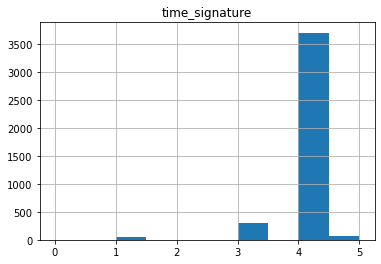

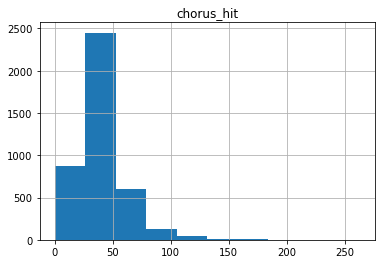

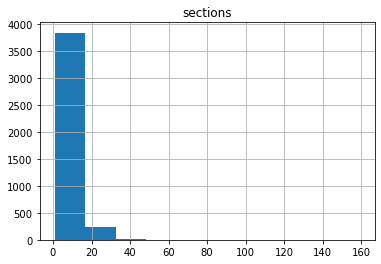

In [19]:
for i in train_x.columns[1:]:
    train_x[i].hist()
    plt.title(i)
    plt.show()

In [22]:
## feature engineering for the 'track'
## Use the len of track name as a feature
## there may be more engineering to be done with nlp, but leave it for another time.
train_x["track_len"] = [len(x) for x in train_x["track"]]

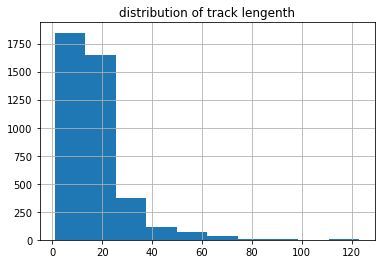

In [23]:
## histogram of the track_len in train set
train_x["track_len"].hist()
plt.title('distribution of track lengenth')
plt.show()

In [24]:
## same for val set
val_x['track_len'] = [len(x) for x in val_x['track']]

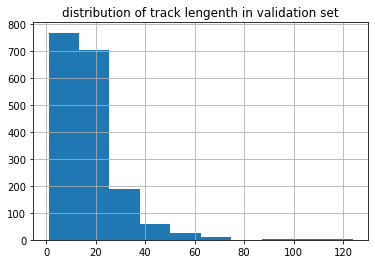

In [25]:
val_x['track_len'].hist()
plt.title('distribution of track lengenth in validation set')
plt.show()

In [26]:
train_x.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,track_len
count,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000,4110.00000
mean,0.54189,0.69360,5.27421,-7.39984,0.64745,0.09155,0.21447,0.14953,0.19492,0.48246,121.59498,256507.51825,3.91022,40.71470,10.98540,17.41436
std,0.19079,0.23856,3.55138,5.06293,0.47782,0.09379,0.29678,0.29986,0.15995,0.25415,30.18265,134985.59914,0.42030,20.40899,5.47036,12.36399
min,0.06000,0.00035,0.00000,-39.98200,0.00000,0.02240,0.00000,0.00000,0.01930,0.00000,47.37000,15920.00000,0.00000,0.00000,1.00000,1.00000
25%,0.41400,0.56700,2.00000,-8.26400,0.00000,0.03630,0.00438,0.00000,0.09420,0.28000,96.98025,206387.00000,4.00000,27.57311,9.00000,10.00000
50%,0.55400,0.74600,5.00000,-5.97900,1.00000,0.05250,0.05935,0.00002,0.13100,0.48500,119.98600,236727.00000,4.00000,36.00292,10.00000,14.00000
75%,0.68100,0.88400,8.00000,-4.51600,1.00000,0.10600,0.31400,0.04830,0.26200,0.68600,141.91350,276890.00000,4.00000,47.64612,12.00000,21.00000
max,0.97800,0.99900,11.00000,1.13700,1.00000,0.94100,0.99600,0.99800,0.98700,0.98200,213.23300,3816373.00000,5.00000,262.61540,159.00000,123.00000


In [28]:
## drop the original track from train and val set
train_x = train_x.drop('track', axis = 1)
val_x = val_x.drop('track', axis = 1)

In [30]:
## feature engineering for categorical variables.
## at first,I thought Key and time_signature would be categorical variables.
## but after more research on the music theory, it seems key is countinous as higher number means higher pitch.
## similar to key, time_signature represent the rythem which usually in fractional notation. Not sure why it is integer here.
## I assume time_signature is continous variable here but it may needs furture clarification.

In [32]:
## create correlation matrix for the predictors
corr_matrix = train_x.corr()
corr_matrix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,track_len
danceability,1.00000,0.06033,0.01593,0.27920,-0.05502,0.16540,-0.16817,-0.33947,-0.10386,0.60062,-0.14745,-0.08745,0.17600,-0.08963,-0.05755,-0.16668
energy,0.06033,1.00000,0.01816,0.78083,-0.01095,0.13566,-0.74729,-0.24013,0.21717,0.28693,0.22024,-0.12704,0.15177,0.00055,-0.15360,-0.19869
key,0.01593,0.01816,1.00000,0.01478,-0.13261,0.02990,-0.00797,-0.00389,-0.02182,0.00522,0.01382,0.00393,-0.00225,-0.00824,-0.00837,0.00674
loudness,0.27920,0.78083,0.01478,1.00000,0.02119,0.10359,-0.68998,-0.45247,0.13155,0.33654,0.16523,-0.14012,0.18619,-0.04808,-0.14712,-0.30180
mode,-0.05502,-0.01095,-0.13261,0.02119,1.00000,-0.06850,0.01749,-0.07196,0.00604,-0.02154,0.02319,-0.04211,0.01322,-0.04045,-0.02804,0.01077
speechiness,0.16540,0.13566,0.02990,0.10359,-0.06850,1.00000,-0.05872,-0.12031,0.13589,0.15900,-0.02549,0.00786,0.02124,-0.00820,0.01448,-0.05898
acousticness,-0.16817,-0.74729,-0.00797,-0.68998,0.01749,-0.05872,1.00000,0.26397,-0.11411,-0.18660,-0.15727,0.11379,-0.18074,-0.01494,0.14166,0.27111
instrumentalness,-0.33947,-0.24013,-0.00389,-0.45247,-0.07196,-0.12031,0.26397,1.00000,-0.04912,-0.33455,-0.02342,0.16277,-0.10308,0.09284,0.11353,0.14637
liveness,-0.10386,0.21717,-0.02182,0.13155,0.00604,0.13589,-0.11411,-0.04912,1.00000,-0.01385,0.04357,-0.00940,0.01874,0.02714,-0.01992,0.03128
valence,0.60062,0.28693,0.00522,0.33654,-0.02154,0.15900,-0.18660,-0.33455,-0.01385,1.00000,0.02001,-0.14845,0.15249,-0.07280,-0.10047,-0.10338


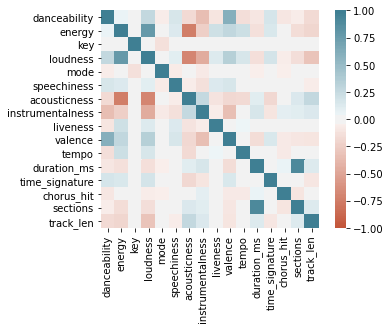

In [33]:
## heatmap of correlation matrix
corr_plot = sns.heatmap(
    corr_matrix,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)

In [34]:
## it seems sections and duration_ms has strong positive correlation
## acounticness has strong negative correlation with energy and loudness.
## Becuase we are using tree based models in this exercise, the interaction between features is less important.

## 2. train a decision tree using the training data. When you train the decision tree model, use a search grid (either grid search or randomized search) to optimize the hyperparameters. Report the AUC on the training and validation set.

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [37]:
## set hyperparameters to a dictionary
params = {'max_depth':range(2,8), 'min_samples_leaf':range(5,55,5), "min_samples_split": range(10,110,5)}

In [38]:
## using grid search to get the optimal hyperparamters
## using n_jobs = 2 because cpu only has two cores.
tree1 = GridSearchCV(DecisionTreeClassifier(), params, n_jobs = 2, scoring = "roc_auc")
tree1.fit(train_x, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'max_depth': range(2, 8),
                         'min_samples_leaf': range(5, 55, 5),
                         'min_samples_split': range(10, 110, 5)},
             scoring='roc_auc')

In [39]:
tree1.best_params_

{'max_depth': 7, 'min_samples_leaf': 50, 'min_samples_split': 35}

### the dictionary above shows the optimal hyperparameters.

In [43]:
tree1.best_estimator_.feature_importances_

array([1.41912468e-01, 2.57080098e-02, 0.00000000e+00, 1.84058283e-02,
       0.00000000e+00, 1.90930697e-02, 7.02421694e-02, 6.29777935e-01,
       0.00000000e+00, 7.31220905e-03, 7.13680603e-04, 7.52438219e-02,
       0.00000000e+00, 0.00000000e+00, 4.68466643e-04, 1.11223425e-02])

In [48]:
tree1_imp = pd.DataFrame(zip(train_x.columns, tree1.best_estimator_.feature_importances_), columns= ['feature', 'importance'])
tree1_imp = tree1_imp.sort_values('importance', ascending = False).reset_index(drop = True)
tree1_imp

,feature,importance
0,instrumentalness,0.62978
1,danceability,0.14191
2,duration_ms,0.07524
3,acousticness,0.07024
4,energy,0.02571
5,speechiness,0.01909
6,loudness,0.01841
7,track_len,0.01112
8,valence,0.00731
9,tempo,0.00071


In [49]:
train_y_prob = tree1.predict_proba(train_x)
val_y_prob = tree1.predict_proba(val_x)

In [54]:
##def a function for logistic model evaluation. reused code from assignment 1
def tree_eva(x,y,model,train_val):
    name = str(train_val)+"_"
    yhat = model.predict(x)
    prob = model.predict_proba(x)
    accuracy = metrics.accuracy_score(y, yhat)
    precision = metrics.precision_score(y, yhat)
    recall = metrics.recall_score(y, yhat)
    fpr, tpr, threshold = metrics.roc_curve(y, prob[:,1], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    f1 = metrics.f1_score(y, yhat)
    value_list = [accuracy, precision, recall, auc, f1]
    name_list = ['accuracy','precision','recall','auc', 'F1_score']
    df = pd.DataFrame(zip(name_list, value_list), columns=['metric','value'])
    plt.plot(fpr, tpr)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot([0, 1], [0, 1], color = 'black', linestyle = "dashed")
    plt.title(str(train_val)+" set ROC")
    plt.show()
    return df

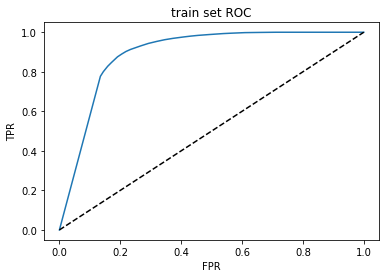

,metric,value
0,accuracy,0.84282
1,precision,0.81480
2,recall,0.88970
3,auc,0.89290
4,F1_score,0.85060


In [55]:
## evaluation for train set
tree1_train_df = tree_eva(x = train_x, y = train_y, model = tree1, train_val = 'train')
tree1_train_df

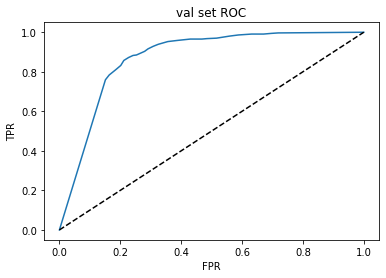

,metric,value
0,accuracy,0.82179
1,precision,0.78876
2,recall,0.87227
3,auc,0.87231
4,F1_score,0.82842


In [56]:
## evaluation for validation set
tree1_val_df = tree_eva(x = val_x, y = val_y, model = tree1, train_val = 'val')
tree1_val_df 

### The AUC on the training set is 0.89290. 
### The AUC on the validation set is 0.87231.

## 3. Random Forest model.

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
## set the hyperparameter ranges
## use same max_depth min_samples_leaf min_samples_split
## since the dataset has 16 features, max features should be around 4
params1 = params
params1['max_samples'] = np.arange(0.1,0.4, 0.05).tolist()
params1['max_features'] = range(2,7)
params1['n_estimators'] = range(100, 400, 50)

In [66]:
params1

{'max_depth': range(2, 8),
 'min_samples_leaf': range(5, 55, 5),
 'min_samples_split': range(10, 110, 5),
 'max_samples': [0.1,
  0.15000000000000002,
  0.20000000000000004,
  0.25000000000000006,
  0.30000000000000004,
  0.3500000000000001,
  0.40000000000000013],
 'max_features': range(2, 7),
 'n_estimators': range(100, 400, 50)}

In [67]:
## using randomized search to optimize the hyperparameters
rf1 = RandomizedSearchCV(RandomForestClassifier(), params1, n_jobs = 2, scoring = "roc_auc", n_iter = 200, random_state = 9660)
rf1.fit(train_x, train_y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=200, n_jobs=2,
                   param_distributions={'max_depth': range(2, 8),
                                        'max_features': range(2, 7),
                                        'max_samples': [0.1,
                                                        0.15000000000000002,
                                                        0.20000000000000004,
                                                        0.25000000000000006,
                                                        0.30000000000000004,
                                                        0.3500000000000001,
                                                        0.40000000000000013],
                                        'min_samples_leaf': range(5, 55, 5),
                                        'min_samples_split': range(10, 110, 5),
                                        'n_estimators': range(100, 400, 50)},
                   random_stat

In [68]:
## optimal hyberparameters
rf1.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_samples': 0.20000000000000004,
 'max_features': 4,
 'max_depth': 7}

In [70]:
rf1.best_estimator_.feature_importances_

array([0.16455008, 0.06838215, 0.00434343, 0.10978126, 0.0015313 ,
       0.02603607, 0.08538129, 0.34298167, 0.0077091 , 0.03588303,
       0.00958087, 0.0826794 , 0.00169572, 0.01061168, 0.01649045,
       0.03236253])

In [71]:
## feature importance for random forest model
rf1_imp = pd.DataFrame(zip(train_x.columns, rf1.best_estimator_.feature_importances_), columns= ['feature', 'importance'])
rf1_imp = rf1_imp.sort_values('importance', ascending = False).reset_index(drop = True)
rf1_imp

,feature,importance
0,instrumentalness,0.34298
1,danceability,0.16455
2,loudness,0.10978
3,acousticness,0.08538
4,duration_ms,0.08268
5,energy,0.06838
6,valence,0.03588
7,track_len,0.03236
8,speechiness,0.02604
9,sections,0.01649


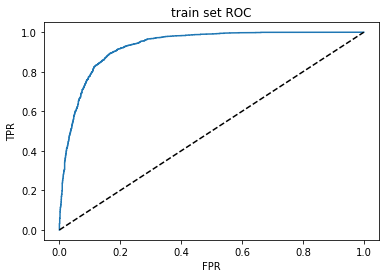

,metric,value
0,accuracy,0.86180
1,precision,0.83595
2,recall,0.90227
3,auc,0.93035
4,F1_score,0.86785


In [73]:
## evaluation for training set
rf1_train_df = tree_eva(x = train_x, y = train_y, model = rf1, train_val = 'train')
rf1_train_df

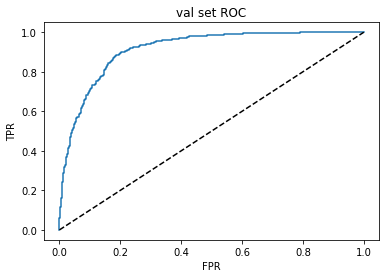

,metric,value
0,accuracy,0.84506
1,precision,0.81368
2,recall,0.88953
3,auc,0.91405
4,F1_score,0.84992


In [75]:
## evaluation for validation set
rf1_val_df = tree_eva(x = val_x, y = val_y, model = rf1, train_val = "val")
rf1_val_df

### The AUC for the training set is 0.93035
### The AUC for the validation set is 0.91405. Pretty good improvement from the decision tree model.

## 4. Gredient boosting model

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
## setting up hyperparameter ranges
params2 = 